# Regression - Large Dataset - WITH Feature Engineering: Salaries.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('C:/Users/Nada Abbas/Desktop/Folder for all/Epsilon AI Diploma/dastasets/Salaries.csv')
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


# [A] Feature Transformations:
## a) Remove NaN Values:

In [5]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
df = df.drop(['Notes','Status','Id'], axis=1)
df = df.drop(df[df['OvertimePay'].isna()==True].index)
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True) # float deal with it using mean
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True) # contain outliers so use median (not affected by outliers as mean)

In [7]:
df.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## b) Handeling Categorical Data:

In [8]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


In [9]:
employee_count = df['EmployeeName'].value_counts()
employee_count[employee_count.values>1].count  
# some employees are repeated through the survay but after all employee name is not a very effective feature

<bound method Series.count of Kevin Lee               13
William Wong            11
Richard Lee             11
Steven Lee              11
John Chan                9
                        ..
Jose L Ortiz             2
Elizabeth A Twidwell     2
Carlos M Avella          2
Joy L Williams           2
GORDON YEE               2
Name: EmployeeName, Length: 34273, dtype: int64>

In [10]:
title_count = df['JobTitle'].value_counts()
title_count 
# Job title is in fact a very important parameter (feature) in benefit prediction but there is a length of 2158 job titles which is very large to transform
# another problem is that I won't be able to convert it using label encoding since they are not ordinal

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
ASSOCIATE MUSEUM CONSERVATOR, ASIAN ART MUSEUM       1
CONFIDENTIAL SECRETARY CITY ATTORNEY                 1
ORTHOPEDIC TECHNICIAN II                             1
MARKET RESEARCH SPECIALISTS, PORT                    1
Public Service Aide-Technical                        1
Name: JobTitle, Length: 2158, dtype: int64

In [11]:
title_count.index

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Police Officer 3', 'Custodian',
       'TRANSIT OPERATOR', 'Firefighter', 'Recreation Leader',
       'Patient Care Assistant',
       ...
       'HEAD AIRPORT ELECTRICIAN', 'LIEUTENANT I, (POLICE DEPARTMENT)',
       'TRAFFIC SIGNAL OPERATOR', 'CASHIER III', 'SHADE AND DRAPERY WORKER',
       'ASSOCIATE MUSEUM CONSERVATOR, ASIAN ART MUSEUM',
       'CONFIDENTIAL SECRETARY CITY ATTORNEY', 'ORTHOPEDIC TECHNICIAN II',
       'MARKET RESEARCH SPECIALISTS, PORT', 'Public Service Aide-Technical'],
      dtype='object', length=2158)

Directors: Senior, director, chief, supervisor, Leader, sheriff, Manager,
Hospital jobs: Nurse, doctor, Physicist, surgent, Pharmacist, Patient, Health
Engineering Jobs: Engineer, Information, architect
Other

In [12]:
job_type = {'Director':['senior','director','chief','supervisor','leader','sheriff','manager','head','department'],
           'Medicin':['nurse', 'doctor', 'sychologist','surgeon', 'pharmacist','patient','health'],
           'Engineering':['engineer','information','architect']}

''' Converted JobTitle into 4 categories: Director, Medicin, Engineering, Otherjobs 
and implemented onehotencoder by hand to perform the categorical to numerical transformation'''

' Converted JobTitle into 4 categories: Director, Medicin, Engineering, Otherjobs \nand implemented onehotencoder by hand to perform the categorical to numerical transformation'

In [13]:
def set_job_type(job, job_category_list):
    job = job.lower()
    words = job.split()
    for word in words:
        if word in job_category_list:
            return 1
        else:
            return 0

In [14]:
Director = []
for i in list(df['JobTitle'].values):
    Director.append(set_job_type(i,job_type['Director']))
len(Director)

148650

In [15]:
Medicin = []
for i in list(df['JobTitle'].values):
    Medicin.append(set_job_type(i,job_type['Medicin']))
len(Medicin)

148650

In [16]:
Engineering = []
for i in list(df['JobTitle'].values):
    Engineering.append(set_job_type(i,job_type['Engineering']))
len(Engineering)

148650

In [17]:
df['Director'] = Director
df['Medicin'] = Medicin
df['Engineering'] = Engineering

In [18]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Director,Medicin,Engineering
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco,0,0,0
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco,0,0,0
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco,0,0,0
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco,0,0,0
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco,0,0,0


In [19]:
OtherJob = [1 if not(i or j or k) else 0 for i,j,k in zip(df['Director'], df['Medicin'], df['Engineering'])]
len(OtherJob)

148650

In [20]:
df['OtherJob'] = OtherJob
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Director,Medicin,Engineering,OtherJob
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco,0,0,0,1
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco,0,0,0,1
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco,0,0,0,1
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco,0,0,0,1
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco,0,0,0,1


In [21]:
df = df.drop(['EmployeeName','JobTitle'],axis=1)

In [22]:
df['Agency'].value_counts() 
#all the examples were taking from a single agency so no need for handling this feature by the model

San Francisco    148650
Name: Agency, dtype: int64

In [23]:
df = df.drop(['Agency'],axis=1)
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Director,Medicin,Engineering,OtherJob
0,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,0,0,0,1
1,155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,0,0,0,1
2,212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,0,0,0,1
3,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,0,0,0,1
4,134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,0,0,0,1


## c) Detect and Handle Outliers:

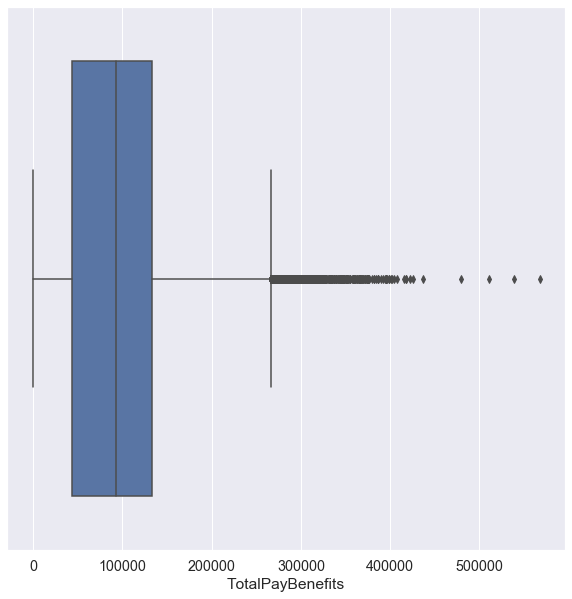

In [24]:
sns.boxplot(x='TotalPayBenefits', data=df)
#sns.stripplot(x = 'TotalPayBenefits', data=df, hue='Year', palette='Pastel1')

In [24]:
df['Year'].value_counts()

2014    38119
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

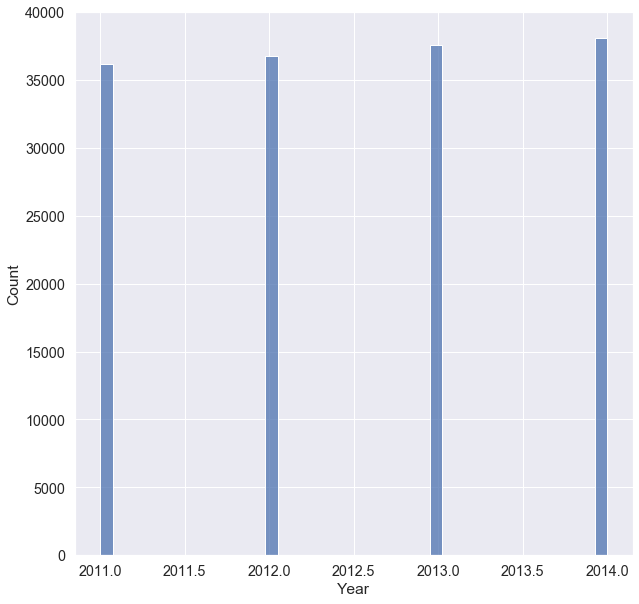

In [26]:
sns.histplot(df['Year'])

In [25]:
lower_limit = df['TotalPayBenefits'].mean()-3*df['TotalPayBenefits'].std()
upper_limit = df['TotalPayBenefits'].mean()+3*df['TotalPayBenefits'].std()
df = df[(df['TotalPayBenefits']<upper_limit)|df['TotalPayBenefits']>lower_limit]

## d) Split to train and test sets:

In [26]:
from sklearn.model_selection import train_test_split

Y = df['TotalPayBenefits']
X = df.drop(['TotalPayBenefits'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=150)

## e) Feature Scaling:

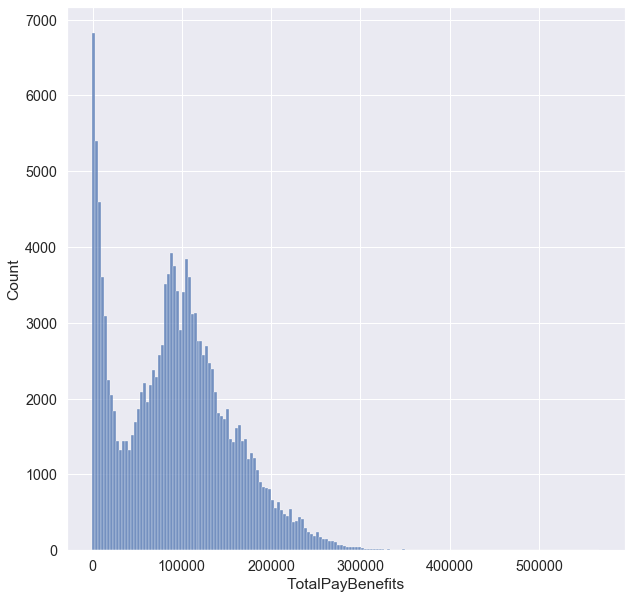

In [27]:
sns.histplot(df['TotalPayBenefits'])

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# [B] Model Selection:

## 1- Gradiend Descend: Logistic Regression:

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linReg = LinearRegression()
linReg.fit(scaled_x_train, y_train)
y_pred = linReg.predict(scaled_x_test)

print(f'Training Score: {linReg.score(scaled_x_train, y_train)}')
print(f'Test Score: {linReg.score(scaled_x_test, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

print(f'coefficients: {linReg.coef_}')
print(f'b (interception): {linReg.intercept_}')
pd.DataFrame(linReg.coef_, X.columns, columns=["Coeff"]) # slightly higher score - slightly lower error

Training Score: 0.988218115230678
Test Score: 0.9883999008005661
Root Mean Square Error: 6800.631615070635
coefficients: [ 2612.67015935   222.57767197   215.89138321 11368.18212578
 65877.68768263 14841.81975657  -501.08966617   843.62972584
  -272.9088118    -69.63124787]
b (interception): 93570.27020552613


,Coeff
BasePay,2612.670159
OvertimePay,222.577672
OtherPay,215.891383
Benefits,11368.182126
TotalPay,65877.687683
Year,14841.819757
Director,-501.089666
Medicin,843.629726
Engineering,-272.908812
OtherJob,-69.631248


## 2- Gradient Descent: Polynomial Regression:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(scaled_x_train)
x_test_poly = poly.fit_transform(scaled_x_test)

linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

print(f'Training Score: {linReg.score(x_train_poly, y_train)}')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # woow !!!!

Training Score: 1.0
Test Score: 1.0
Root Mean Square Error: 0.0002178786680166626


## 3- Gradient Descent: SVM - Linear: 
same problem it doesn't work for very large datasets must be trained on batches

In [ ]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(scaled_x_train, y_train)
y_pred = svm.predict(scaled_x_test)

print(f'Training Score: {svm.score(scaled_x_train, y_train)}')
print(f'Test Score: {svm.score(scaled_x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') 

## 4- Gradient Descent: SVM - Polynomial:

In [ ]:
svm = SVR(kernel='poly') # just testing for polynomial SVM since it gave better results in Regression
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) # very slow model

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') 

## 5- Decision Tree:

In [31]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(scaled_x_train, y_train)
y_pred = DecTree.predict(scaled_x_test)

print(f'Training Score: {DecTree.score(scaled_x_train, y_train)}')
print(f'Test Score: {DecTree.score(scaled_x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  

# not the highest test score and error is higher than that of polynomial regression

Training Score: 1.0
Test Score: 0.9998435924803827
Root Mean Square Error: 789.6728614188622


# though Polynomial Regression gave idealistic results (most probably there is a problem wih this model train) Use Decision Tree for this case

#### with Feature Engineering:
- Training Score: 1.0
- Test Score: 0.9998435924803827
- Root Mean Square Error: 789.6728614188622

#### Without Feature Engineering:
- Training Score: 1.0
- Test Score: 0.9998449454545393
- Root Mean Square Error: 786.2499839958834

## Select without feature engineering since it has slightly higher score and lower RMSE